In [1]:
import rbo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=pd.read_csv("RBO-TDType-Repayment.csv")

In [14]:
dd_rank=data[data['TDTYPE']=='DESIGN DEBT']
td_rank=data[data['TDTYPE']=='TEST DEBT']
cd_rank=data[data['TDTYPE']=='CODE DEBT']

In [15]:
tdtypes=['DESIGN DEBT','TEST DEBT','CODE DEBT']
p_values=np.arange(0.5, 0.98, 0.01)

In [16]:
rboDF=pd.DataFrame(columns = ['tdtypes' , 'p', 'RBO'])
for i in range(len(tdtypes)):
    for j in range(len(tdtypes)):
        if i>j:
            for p_val in p_values:
                #print(countries[i]+"-"+countries[j]+","+str(p))
                rbo_ext=rbo.rbo(data[data['TDTYPE']==tdtypes[i]]['PAYMENT'], data[data['TDTYPE']==tdtypes[j]]['PAYMENT'], p=p_val)
                #rboDF=rboDF.append({'Countries':'CO-CHI','p':0.5,'RBO':99},ignore_index=True)
                rboDF=rboDF.append({'tdtypes':tdtypes[i]+"-"+roles[j],'p':p_val,'RBO':rbo_ext['ext']},ignore_index=True)
            
        

In [17]:
rbo_ext=rbo.rbo(data[data['TDTYPE']==tdtypes[0]]['PAYMENT'], data[data['TDTYPE']==tdtypes[1]]['PAYMENT'], p=0.95)
rbo_ext

{'min': 0.4464516387325103,
 'res': 0.27128207548253247,
 'ext': 0.5697451205262833}

In [18]:
rboDF.sample(5)

,tdtypes,p,RBO
112,CODE DEBT-TEST DEBT,0.66,0.239578
45,TEST DEBT-DESIGN DEBT,0.95,0.569745
109,CODE DEBT-TEST DEBT,0.63,0.232048
23,TEST DEBT-DESIGN DEBT,0.73,0.334527
0,TEST DEBT-DESIGN DEBT,0.50,0.212420


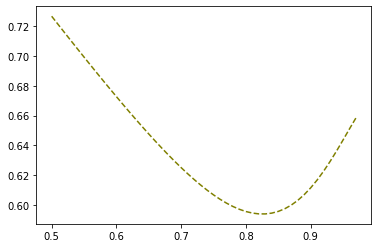

In [19]:
plt.plot( 'p', 'RBO', data=rboDF[rboDF['tdtypes']=='CODE DEBT-DESIGN DEBT'], color='olive', linestyle='dashed', label=roles[i]+"-"+tdtypes[j])

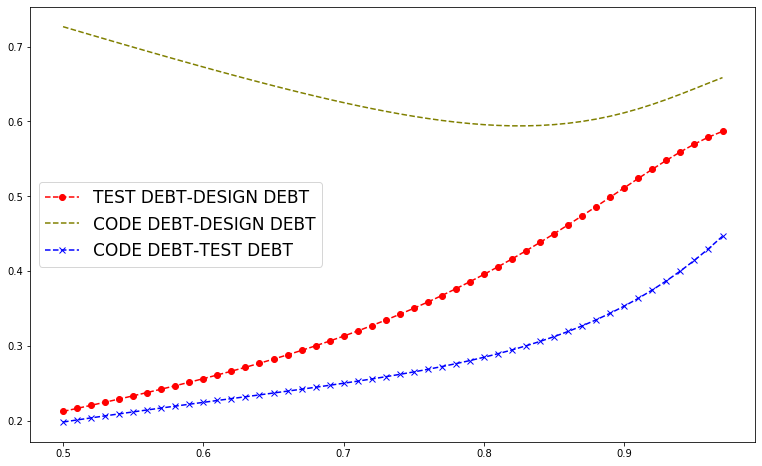

In [20]:
colors=['red','olive','blue','black','green','orange']
markers=['o','','x','o','','x']
plt.figure(figsize=(13,8))
count=0
for i in range(len(tdtypes)):
    for j in range(len(tdtypes)):
        if i>j:
            
            pair=tdtypes[i]+"-"+tdtypes[j]
            plt.plot( 'p', 'RBO', data=rboDF[rboDF['tdtypes']==pair], marker=markers[count], color=colors[count]
                     , linestyle='dashed', label=pair)
            count=count+1
plt.legend(prop={'size': 17})


In [21]:
rbo.rbo(dd_rank['PAYMENT'], cd_rank['PAYMENT'], p=.5)

{'min': 0.7265903212031537,
 'res': 1.5549261784563614e-05,
 'ext': 0.7266153867710948}

In [22]:
rbo.rbo(dd_rank['PAYMENT'], cd_rank['PAYMENT'], p=.97)

{'min': 0.3705145828221434,
 'res': 0.4511206062287778,
 'ext': 0.6585556333112792}

In [23]:
rbo.rbo(cd_rank['PAYMENT'], td_rank['PAYMENT'], p=.5)

{'min': 0.19825050553780876,
 'res': 1.88725141775844e-05,
 'ext': 0.19825996508735766}

In [13]:
rbo.rbo(cd_rank['PAYMENT'], td_rank['PAYMENT'], p=.97)

{'min': 0.7153123705025957,
 'res': 1.6220833121651017e-06,
 'ext': 0.7153138123878064}

In [24]:
rbo.rbo(td_rank['PAYMENT'], dd_rank['PAYMENT'], p=.5)

{'min': 0.2124164360558023,
 'res': 3.510889367852091e-06,
 'ext': 0.21241962030818634}

In [25]:
rbo.rbo(td_rank['PAYMENT'], dd_rank['PAYMENT'], p=.97)

{'min': 0.3831360129131088,
 'res': 0.43131912630238034,
 'ext': 0.5867059464456037}